## Assignment 2

# Comparison of the exponential and running mean for random walk model

**Starodumova P., Antonov A., Babaev N., Krivova V. | Skoltech EDP course by Tatiana Podladchikova, 2020**

**The objective of this Assignment 2 is to compare the errors of exponential and running mean in order to choose the most effective quasi-optimal estimation method in conditions of uncertainty as well as solve identification problem of noise statistics that is crucial for reliable estimation.**

In [ ]:
# Import libraries required for operation with multi-dimensional arrays and matrixes (numpy) 
# and data visualization (matplotlib)

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(4)

### Part 1. Determination of optimal smoothing constant in exponential mean

**Firstly, we generate a true trajectory using the random walk model:**

${X_{i}} = {X_{i - 1}} + w_{i}$

In [2]:
# Define a function which returns a true trajectory generated by using the random walk model

def randomWalk(mean,sigma,size,initial):
    arr = [initial]
    for i in range(0,size  - 1):
        arr.append(arr[i] + np.random.normal(mean,sigma))
    return arr

In [3]:
# Input initial data

initial = 10
variance = 8
sigma = variance**0.5
varianceMeas = 16
sigmaMeas = varianceMeas**0.5

In [4]:
# Generate true trajectories with lengths of 300 and 3000 points, respectfully

arr300 = randomWalk(0,sigma,300,initial)
arr3000 = randomWalk(0,sigma,3000,initial)

**Secondly, we generate measurements of the process $X_i$:**

${Z_{i}} = X_{i} + \eta_i$

In [5]:
# Define a function which returnes generated measurements of the process

def measurements(randomWalk,mean,sigma):
    arr = randomWalk.copy()
    for i in range(0,len(arr)):
        arr[i] = arr[i] + np.random.normal(mean,sigma)
    return arr

In [6]:
# Generate measurements for the process

meas300 = measurements(arr300,0,sigmaMeas)
meas3000 = measurements(arr3000,0,sigmaMeas)

**Using identification method, we identify $\sigma_w^2$ and $\sigma_{\eta}^2$:**

$E[v_{i}^2] \approx \frac{1}{(N - 1)} \sum \limits_{k = 2}^{N}\nu_{k}^2$ - mathematical expectation (1)

$\nu_{i} = z_{i} - z_{i - 1}$ - residual (1)

In [34]:
# Define a function which returns mathematical expectation (1)

def v(arr):
    sum = 0
    for i in range(1,len(arr)):
        sum += (arr[i] - arr[i - 1])**2
    return sum/(len(arr) - 1)

$E[\rho_{i}^2] \approx \frac{1}{(N - 2)} \sum \limits_{k = 3}^{N}\rho_{k}^2$ - mathematical expectation (2)

$\rho_{i} = z_{i} - z_{i - 2}$ - residual (2)

In [8]:
# Define a function which returns mathematical expectation (2)

def p(arr):
    sum = 0
    for i in range(2,len(arr)):
        sum += (arr[i] - arr[i - 2])**2
    return sum/(len(arr) - 2)

**Consistent estimates $\sigma_w^2$ and $\sigma_{\eta}^2$ are obtained by solving equation system:**

$E[\nu_{i}^2] = \sigma_{w}^2 + 2\sigma_{\eta}^2$

$E[\rho_{i}^2] = 2\sigma_{w}^2 + 2\sigma_{\eta}^2$

**Thus,**

$\sigma_{\omega}^2 = E[\rho_{i}^2] - E[\nu_{i}^2]$

$\sigma_{\eta}^2 = \frac{2E[\nu_{i}^2] - E[\rho_{i}^2]}{2}$

In [36]:
# Define a function which returns a variance of normally distributed random noise of the process

def wDerSq(v,p):
    return p - v

In [37]:
# Define a function which returns a variance of normally distributed random noise of the measurements

def nDerSq(v,p):
    return (2*v - p)/2

**Optimal smoothing coefficient in exponential smoothing is calculated as follows:**

$\alpha = \frac{-\chi + \sqrt{\chi^2 + 4\chi}}{2}$

$\chi = \frac{\sigma_{\omega}^2}{\sigma_{\eta}^2}$

In [11]:
# Define a function which returns alpha

def smoothCoef(x):
    return (-x + (x**2 + 4*x)**0.5)/2

In [12]:
# Define a function which returns chi

def optimalCoef(meas):
    v_val = v(meas)
    p_val = p(meas)
    x = wDerSq(v_val,p_val) / nDerSq(v_val,p_val)
    return smoothCoef(x)

In [39]:
# Calculate optimal smoothing constant for a 300-points trajectory

smoothCoef300 = optimalCoef(meas300)

In [41]:
print('Optimal smoothing constant for a 300-points trajectory is', smoothCoef300)

Optimal smoothing constant for a 300-points trajectory is 0.6040363144289731


In [15]:
# Calculate optimal smoothing constant for a 3000-points trajectory

smoothCoef3000 = optimalCoef(meas3000)

In [40]:
print('Optimal smoothing constant for a 3000-points trajectory is', smoothCoef3000)

Optimal smoothing constant for a 3000-points trajectory is 0.5247952068220683


**As a result, we perform exponential smoothing with determined optimal smoothing constant $\alpha$ for both trajectories:**

$\hat{X_{i}} = \hat{X_{i - 1}} + \alpha(z_{i} - \hat{X_{i-1}})$

In [17]:
# Define a function which returns an array of smoothed measurements of the process under study

def smoothExp(meas,coef):
    arr = meas.copy()
    arr[0] = arr[0]*coef
    for i in range(1,len(arr)):
        arr[i] = arr[i - 1] + coef*(arr[i] - arr[i - 1])
    return arr

In [42]:
# Calculate smoothed measurements for a 300-points trajectory

smoothedExp300 = smoothExp(meas300,smoothCoef300)

In [43]:
# Calculate smoothed measurements for a 3000-points trajectory

smoothedExp3000 = smoothExp(meas3000,smoothCoef3000)

In [58]:
# Define a function which plot a graph to compare measurements, true values and smoothed data

def showPlease(arr,legend):
    params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
    plt.rcParams.update(params)
    fig, ax = plt.subplots()
    for i in arr:
        ax.plot(i)
    fig.set_figwidth(24)
    fig.set_figheight(12)
    plt.title('Comparison of true values, measurements and smoothed data', fontsize = 22)
    plt.grid()
    plt.xlabel('Time', fontsize = 18)
    plt.ylabel('Value', fontsize = 18)
    plt.legend(legend)
    plt.show()

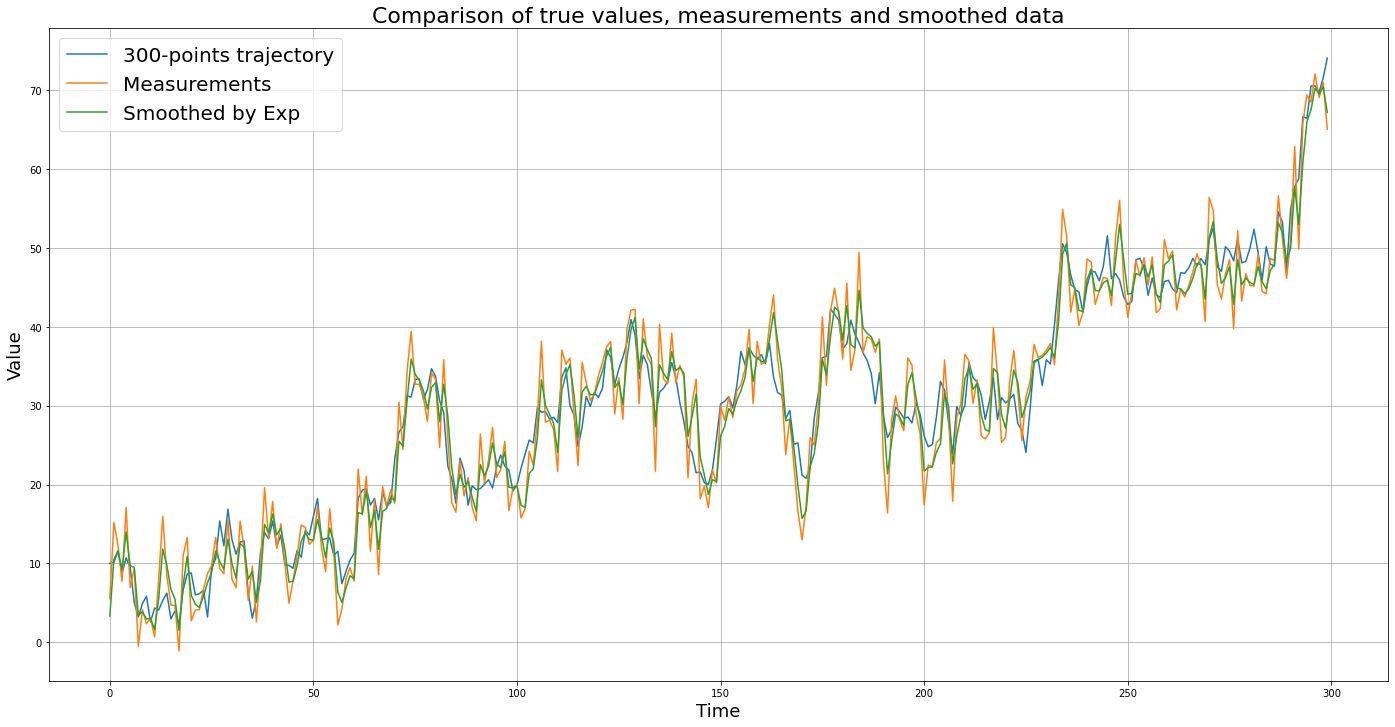

In [64]:
showPlease([arr300,meas300,smoothedExp300],['300-points trajectory','Measurements','Smoothed by Exp'])

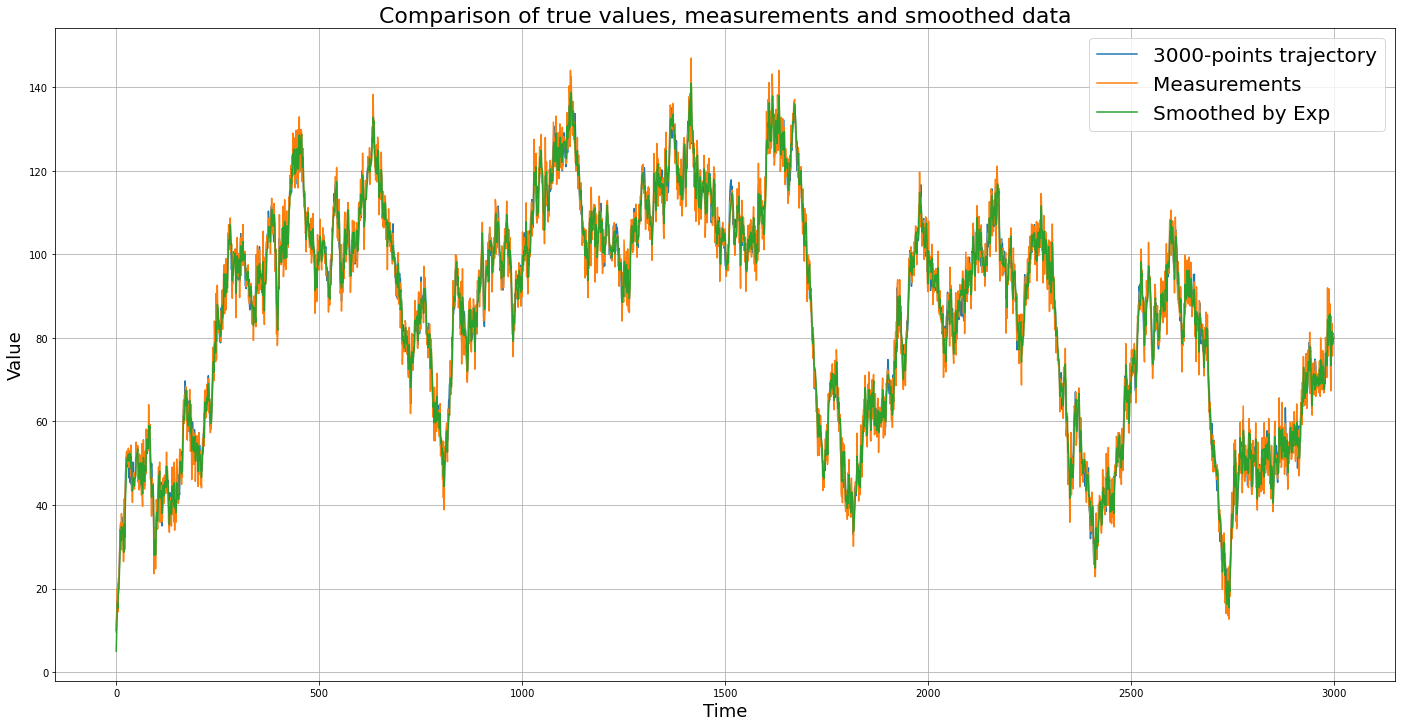

In [65]:
showPlease([arr3000,meas3000,smoothedExp3000],['3000-points trajectory','Measurements','Smoothed by Exp'])

**Comments on it**

### Part 2. Comparison of methodical errors of exponential and running mean.


In [23]:
# Input initial data

initial_2 = 10
sigma_2 = 28
sigmaMeas_2 = 97

In [24]:
# Generate a 300-points true trajectory using random walk model 

arr = randomWalk(0,sigma_2,300,10)

In [25]:
# Generate measurements of the aforementioned process

meas = measurements(arr,0,sigmaMeas_2)

In [26]:
# Determine optimal smoothing coefficient alpha

coef = smoothCoef(sigma_2**2/sigmaMeas_2**2)

In [67]:
print ('Smoothing coefficient alpha equals to', coef)

Smoothing coefficient alpha equals to 0.24998861233121078


**Measurement errors of running mean and exponential smoothing are calculated as follows:**

$\sigma_{RM}^2 = \frac{\sigma_{\eta}^2}{M}$

$\sigma_{ES}^2 = \sigma_{\eta}^2\frac{\alpha}{2 - \alpha}$

**The window size M is determined by the equation $\sigma_{RM}^2$ = $\sigma_{ES}^2$ resulting in**

$M = \frac{2 - \alpha}{\alpha} $

In [28]:
# Calculate the window size rounding the result to integer

M = int(round((2 - coef)/coef))

In [68]:
print ('The window size equals to', M)

The window size equals to 7


**The running mean calculation is conducted as follows:**



$\hat{X_{i}} = \frac{1}{M}\sum \limits _{k=i-\frac{M-1}{2}}^{i+\frac{M-1}{2}}z_k$

In [30]:
# Calculate the running mean

def runningMean(meas,M):
    new_meas = np.array(meas.copy())
    wide = int((M - 1)/2)
    arr = meas.copy()
    for i in range(wide,len(meas) - wide):
        arr[i] = new_meas[i - wide:i + wide + 1].mean()
    return arr

In [31]:
# Running mean smoothing

smoothedRun = runningMean(meas,M)

In [32]:
# Exponential mean smoothing

smoothedExp = smoothExp(meas,coef)

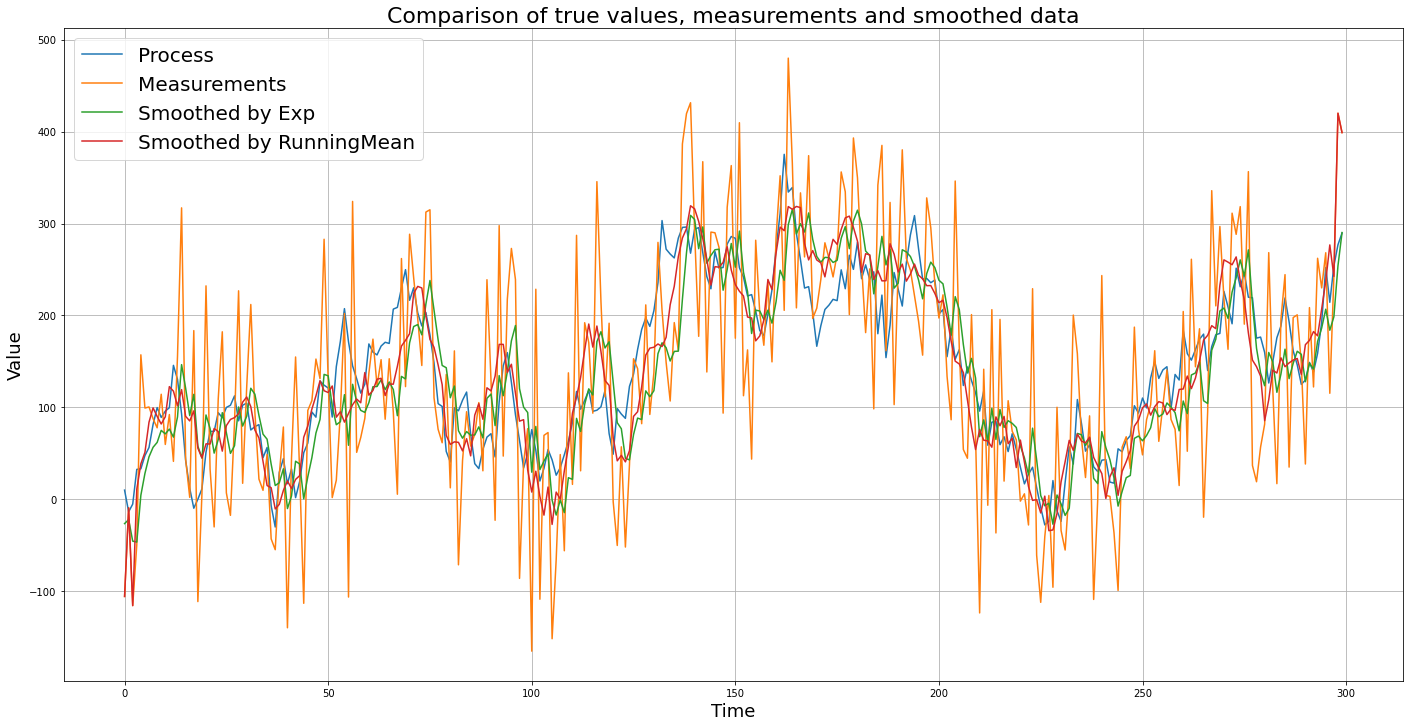

In [70]:
# Plot a graph to compare measurements, true values and smoothed data

showPlease([arr,meas,smoothedExp,smoothedRun],['Process','Measurements','Smoothed by Exp','Smoothed by RunningMean'])

**Comments on it**

**Conclusion:**